# 代表的な前処理（正規化・標準化）
- ヒストグラムを表示しながら、正規化・標準化の性質を確認しよう


### 正規化・標準化の重要性
* 尺度の異なる変数が混在している場合(例えば1～10と1～1,000,000など)、尺度の大きな変数ほどモデルへの影響度が大きくなることがある
* これを回避するために、あらかじめ尺度を揃えておくことがよく行われる
* 尺度を揃える方法として、正規化や標準化がある
* 尺度の影響を受けるかどうかはアルゴリズムによる
    * 影響を受けやすいアルゴリズムの例:k近傍法、ニューラルネットワーク
    * 影響を受けにくいアルゴリズムの例：決定木、ランダムフォレスト

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# セルの途中でhead()などを使うための関数
from IPython.display import display

# 正規化を行うためのクラスと、標準化を行うためのクラス
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 2. 正規化・標準化の手順
### 2-1. 手計算で行う場合

In [2]:
# データの生成
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)

# 正規化の計算
df["normalized"] = (df["input"] - df["input"].min()) / (df["input"].max() - df["input"].min())

# 標準化の計算
df["standardized"] = (df["input"] - df["input"].mean()) / df["input"].std(ddof=0)
# ddof; Delta Degrees of Freedom
# std(ddof=1) を実行すると、不偏分散の平方根が求まる

# 処理前後のデータを表示
display(df)

input  normalized  standardized
0    0.0         0.0      -1.46385
1    1.0         0.2      -0.87831
2    2.0         0.4      -0.29277
3    3.0         0.6       0.29277
4    4.0         0.8       0.87831
5    5.0         1.0       1.46385

### 2-2. scikit-learnを用いる場合

In [3]:
# データの生成
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)

# 正規化を行うためのクラス
mms = MinMaxScaler()
# 正規化の実行
mms.fit_transform(df[["input"]].values)

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [4]:
# データの生成
df = pd.DataFrame({"input":[0,1,2,3,4,5]},dtype=float)

# 標準化を行うためのクラス
stdsc = StandardScaler()
# 標準化の実行
stdsc.fit_transform(df[["input"]].values)

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

## 3. 疑似データに対する処理
### 3-1. 疑似データの生成
- 「平均が0、分散が1の正規分布」と「平均が100、分散が1の正規分布」を比較

a           b
0  0.471435   98.417792
1 -1.190976   98.379810
2  1.432707  100.046562
3 -0.312652   98.320171
4 -0.720589  101.395892
5  0.887163   99.155029
6  0.859588  100.814007
7 -0.636524   99.950258
8  0.015696  100.534247
9 -2.242685   99.192991

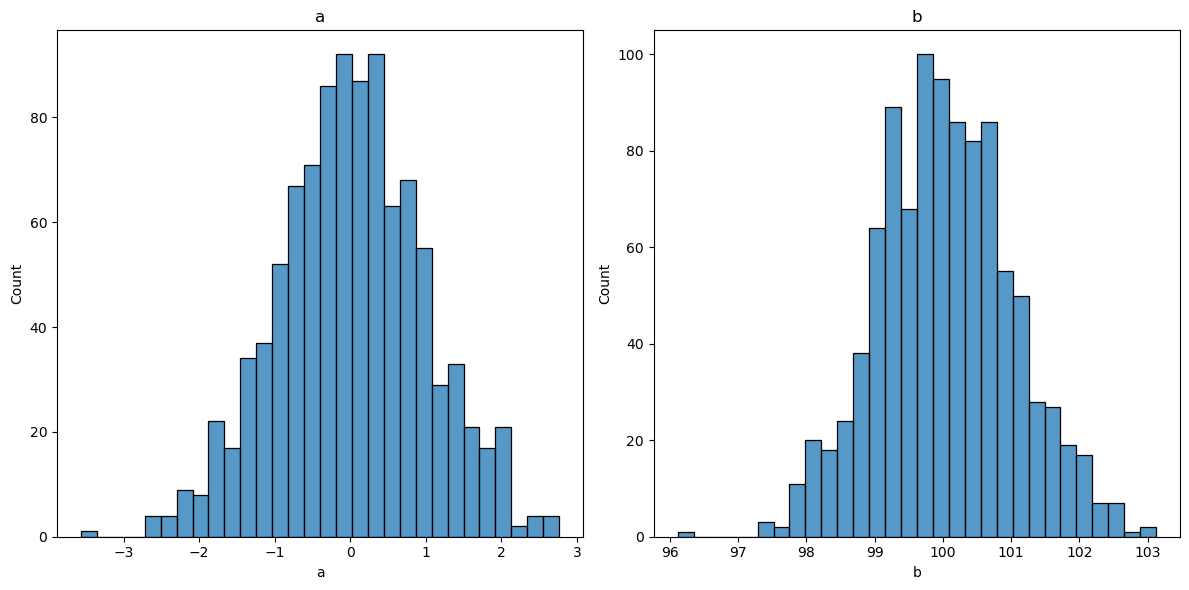

In [5]:
# 乱数シードの固定
np.random.seed(1234)
# 正規分布からデータをサンプリング
df = pd.DataFrame({
    "a": np.random.normal(loc=0, scale=1, size=1000),
    "b": np.random.normal(loc=100, scale=1, size=1000)
})

# データフレームの最初の10行を表示
display(df.head(10))

# 描画エリアの作成
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# ヒストグラムを描画
sns.histplot(df['a'], kde=False, bins=30, ax=axes[0])
sns.histplot(df['b'], kde=False, bins=30, ax=axes[1])
# グラフタイトルの設定
axes[0].set_title("a")
axes[1].set_title("b")
# 表示位置の調整
plt.tight_layout()
plt.show()

### 3-2. 異常値の付加

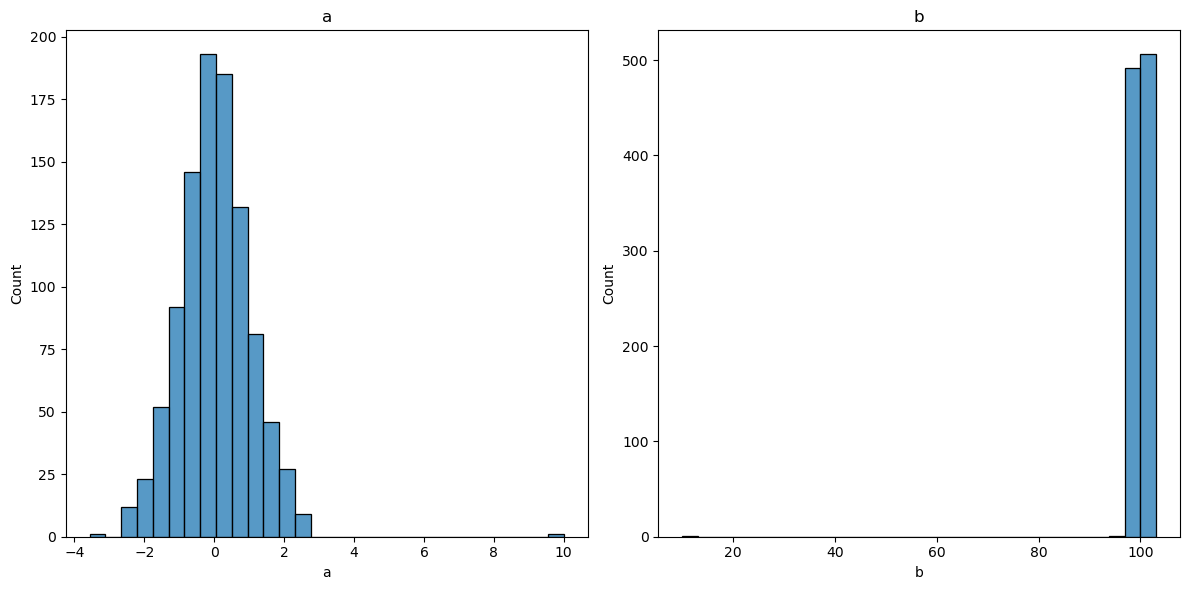

In [6]:
# 異常値を混ぜる
df.loc[0,"a"] = 10
df.loc[0,"b"] = 10

# 描画エリアの作成
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# ヒストグラムを描画
sns.histplot(df['a'], kde=False, bins=30, ax=axes[0])
sns.histplot(df['b'], kde=False, bins=30, ax=axes[1])
# グラフタイトルの設定
axes[0].set_title("a")
axes[1].set_title("b")
# 表示位置の調整
plt.tight_layout()
plt.show()

### 3-3. 正規化・標準化の実行

a           b    a_norm    b_norm   a_stand    b_stand
0  10.000000   10.000000  1.000000  0.000000  9.751794 -29.853237
1  -1.190976   98.379810  0.174921  0.949038 -1.189062  -0.522216
2   1.432707  100.046562  0.368358  0.966936  1.375981   0.030937
3  -0.312652   98.320171  0.239677  0.948398 -0.330368  -0.542009
4  -0.720589  101.395892  0.209601  0.981426 -0.729188   0.478745

正規化の結果


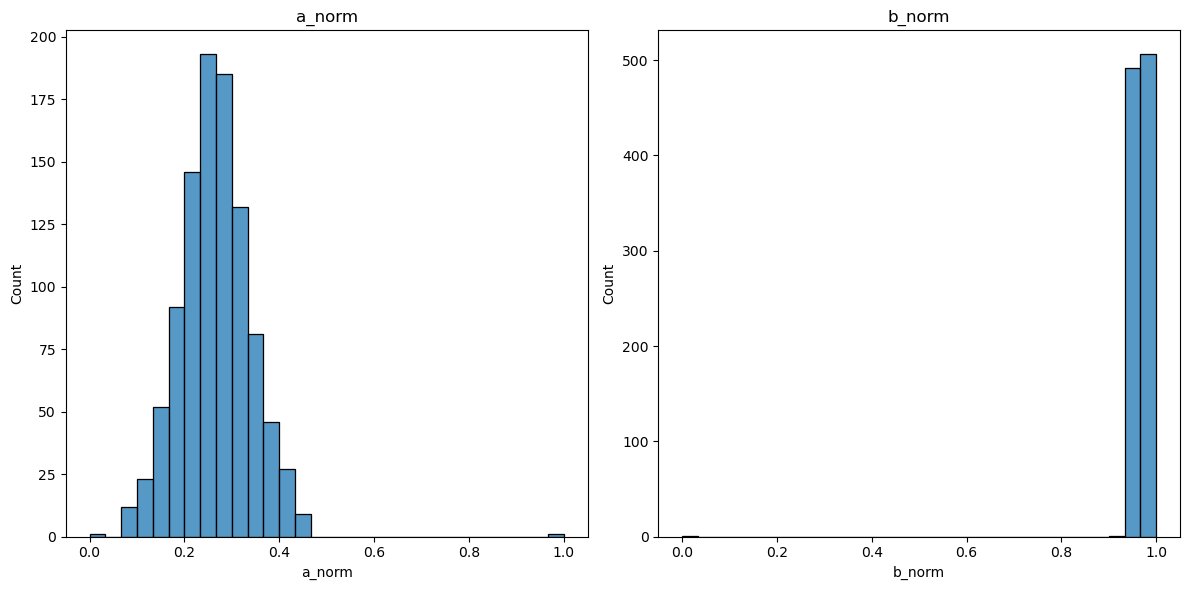

標準化の結果


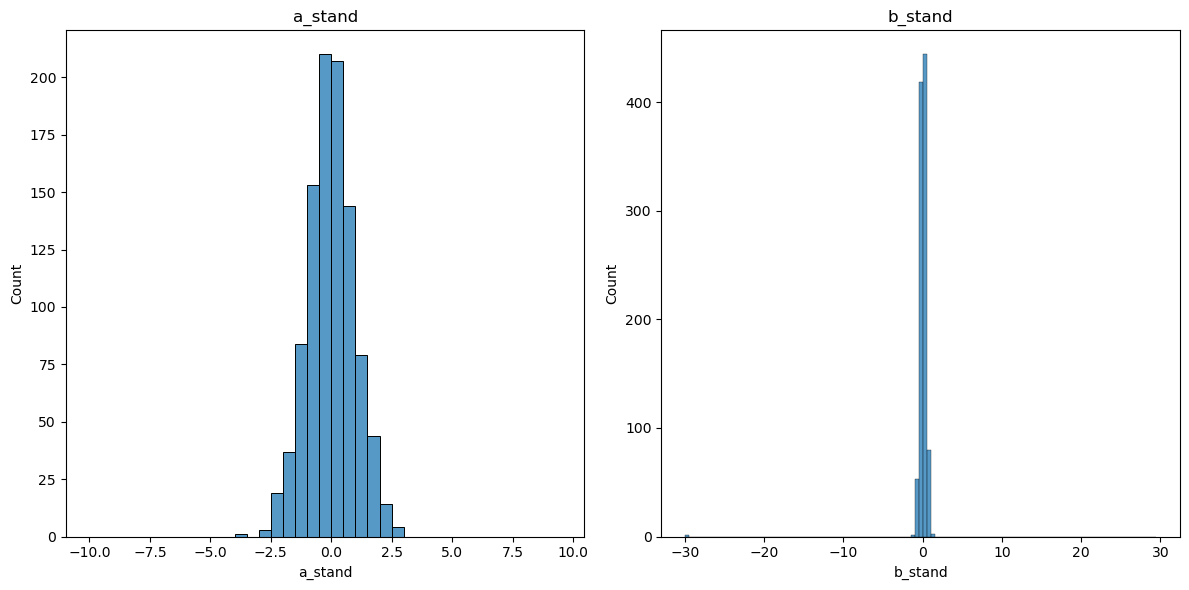

In [7]:
# 正規化
mms = MinMaxScaler()
df["a_norm"] = mms.fit_transform(df[["a"]].values)
df["b_norm"] = mms.fit_transform(df[["b"]].values)

# 標準化
stdsc = StandardScaler()
df["a_stand"] = stdsc.fit_transform(df[["a"]].values)
df["b_stand"] = stdsc.fit_transform(df[["b"]].values)

# 処理前後のデータを表示
display(df.head())

# 正規化後のヒストグラム
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['a_norm'], kde=False, bins=30, ax=axes[0])
sns.histplot(df['b_norm'], kde=False, bins=30, ax=axes[1])
axes[0].set_title("a_norm")
axes[1].set_title("b_norm")
print("正規化の結果")
plt.tight_layout()
plt.show()

# 標準化後のヒストグラム
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 最も大きい絶対値を取り出す
max_abs_a = np.ceil(np.abs(df["a_stand"]).max())
max_abs_b = np.ceil(np.abs(df["b_stand"]).max())
# 0が中心となるようにビンを設定
bins_a = np.arange(-max_abs_a, max_abs_a, 0.5)
bins_b = np.arange(-max_abs_b, max_abs_b, 0.5)
# ヒストグラムの表示
sns.histplot(df['a_stand'], kde=False, bins=bins_a, ax=axes[0])
sns.histplot(df['b_stand'], kde=False, bins=bins_b, ax=axes[1])
axes[0].set_title("a_stand")
axes[1].set_title("b_stand")
print("標準化の結果")
plt.tight_layout()
plt.show()

### まとめ
* 0-1にスケーリングしたいのであれば、正規化
* 0付近にスケーリングしたいのであれば、標準化
* 正規化は外れ値の影響を受けやすい

## 4. ワインデータセットに対する処理
* https://archive.ics.uci.edu/ml/datasets/wine
* 化学的性質からブドウ品種を識別する問題
* Class label：イタリアのある地域で栽培されているブドウ品種の種類
* Class label以外：化学的性質


### 4-1. データの読み込み

In [9]:
# CSVファイルの読み込み
df_wine = pd.read_csv("../../1_data/ch6/wine.csv",index_col=[0])
print("")
print("データセットの頭出し")
display(df_wine.head())

print("")
print("目的変数（クラスラベル）の内訳")
display(df_wine.groupby(["Class label"])["Class label"].count())

print("")
print("説明変数の要約")
display(df_wine.iloc[:,1:].describe())


データセットの頭出し


Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735


目的変数（クラスラベル）の内訳


Class label
1    59
2    71
3    48
Name: Class label, dtype: int64


説明変数の要約


Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

### 4-2. データの可視化
クラスラベルと化学成分の関係を把握するために、グラフを描いてみる
- 散布図行列の表示
- データの分割
- ヒストグラムの表示

#### 4-2-1. 散布図行列の表示

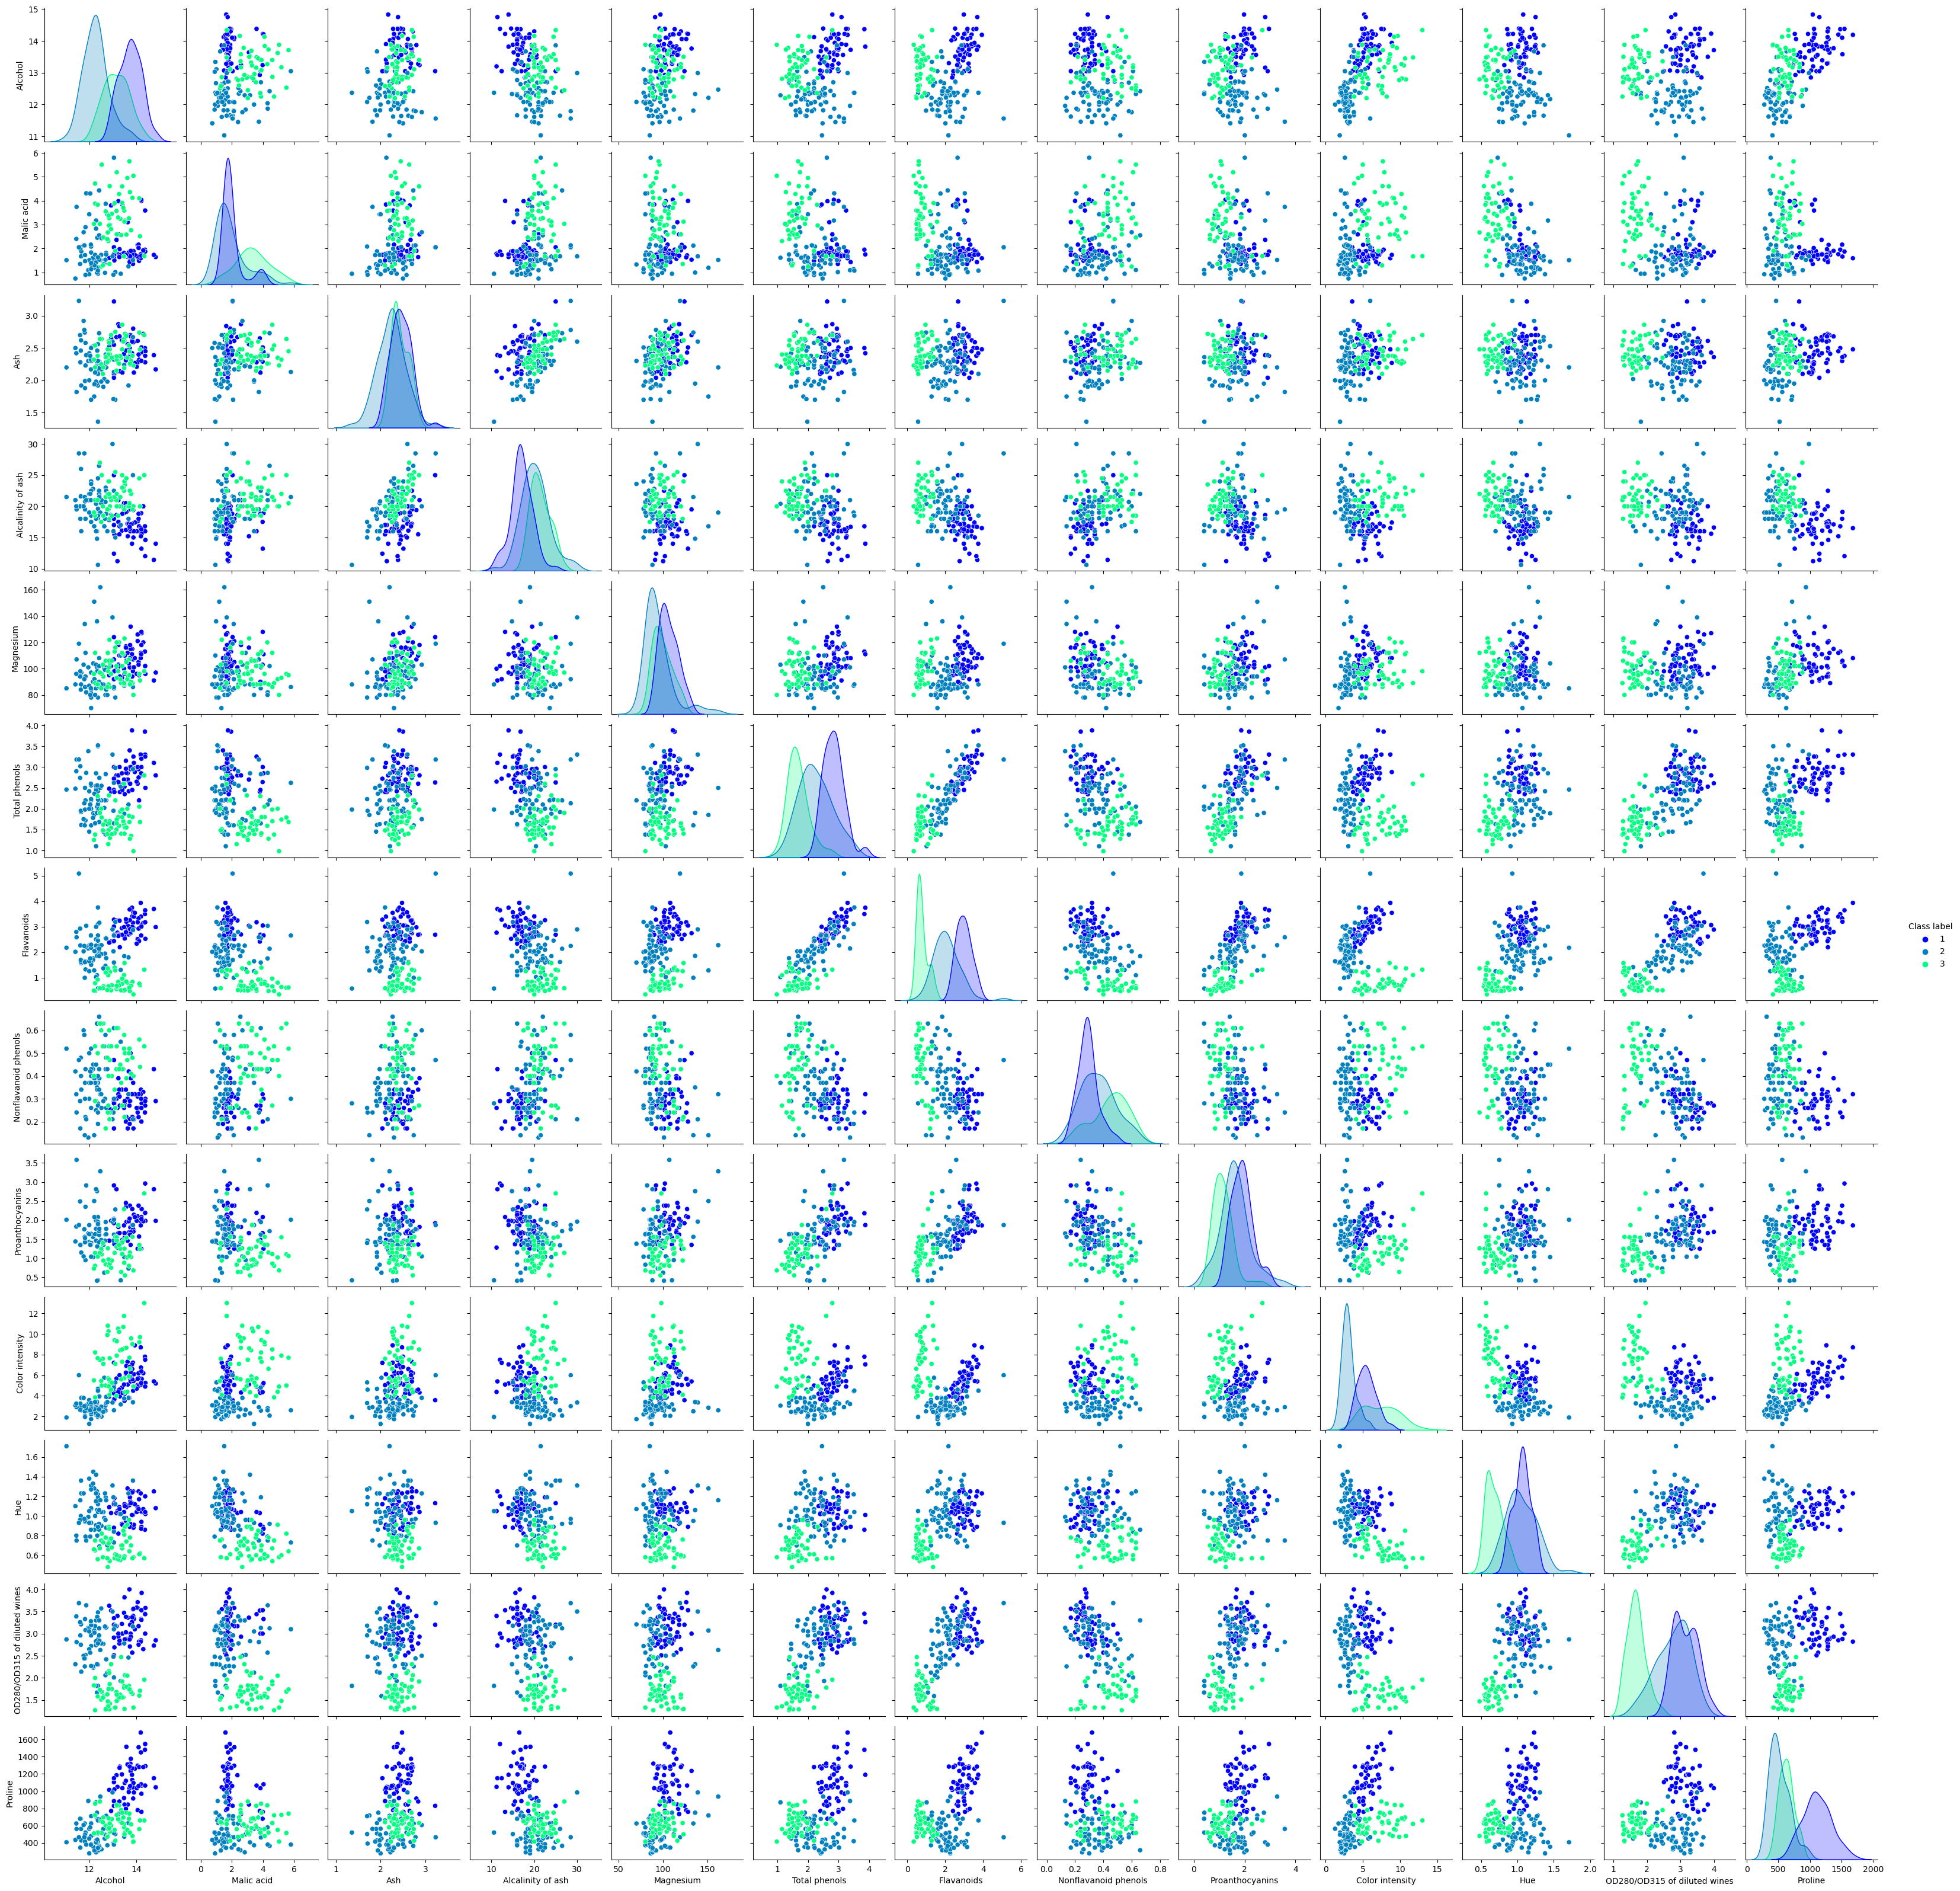

In [10]:
# 変数の数が多いため、かなり時間がかかる
# クラスラベルで色分け
sns.pairplot(df_wine, hue="Class label", palette="winter")
plt.show()

#### 4-2-2. データの分割

In [11]:
# 説明変数
X = df_wine.iloc[:,1:].values
# 目的変数
y = df_wine["Class label"].values

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (124, 13)
y_train: (124,)
X_test: (54, 13)
y_test: (54,)


#### 4-2-3. ヒストグラムの表示
- 正規化・標準化する前の、1つ目の特徴に関するヒストグラムを出してみる

加工前のデータ


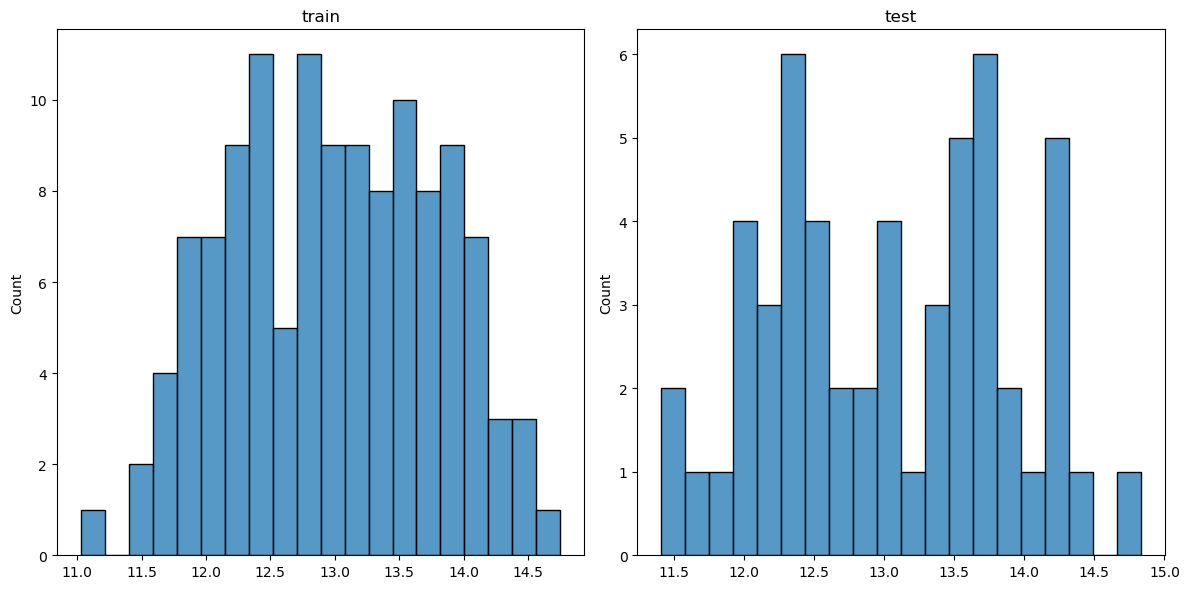

In [12]:
# 描画エリアの作成
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 学習用データのヒストグラム
sns.histplot(X_train[:, 0], bins=20, ax=axes[0]) 
# テスト用データのヒストグラム
sns.histplot(X_test[:, 0], bins=20, ax=axes[1])

# グラフタイトルの設定
axes[0].set_title("train")
axes[1].set_title("test")
print("加工前のデータ")
plt.tight_layout()
plt.show()


### 4-3. [演習] 正規化・標準化の実行
- まず、学習用データおける統計量を計算
    - fit() / fit_transform()
- その値を再利用して、テスト用データの正規化/標準化を行う
    - transform()
- 以下のコードにおいて、「*」をtrainまたはtestに置き換えよう

#### 4-3-1. 正規化

In [ ]:
# 学習用データの正規化
normsc = MinMaxScaler()
X_train_norm = normsc.fit_transform(X_*)

# テスト用データの正規化
X_test_norm = normsc.transform(X_*)

# 描画エリアの作成
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 1つ目の特徴に関するヒストグラム
sns.histplot(X_train_norm[:, 0], bins=20, ax=axes[0]) 
sns.histplot(X_test_norm[:, 0], bins=20, ax=axes[1])
print("正規化後のデータ")
# グラフタイトルの設定
axes[0].set_title("train")
axes[1].set_title("test")
plt.show()

#### 4-3-2. 標準化

In [ ]:
# 学習用データの標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_*)

# テスト用データの標準化
X_test_stand = stdsc.transform(X_*)

# 描画エリアの作成
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 最も大きい絶対値を取り出す
max_abs_train = np.ceil(np.abs(X_train_stand[:,0]).max())
max_abs_test = np.ceil(np.abs(X_test_stand[:,0]).max())
# 0が中心となるようにビンを設定
bins_train = np.arange(-max_abs_train, max_abs_train, 0.25)
bins_test = np.arange(-max_abs_test, max_abs_test, 0.25)
# 1つ目の特徴に関するヒストグラム
sns.histplot(X_train_stand[:, 0], bins=bins_train, ax=axes[0]) 
sns.histplot(X_test_stand[:, 0], bins=bins_test, ax=axes[1]) 
print("標準化後のデータ")
# グラフタイトルの設定
axes[0].set_title("train")
axes[1].set_title("test")
plt.show()